<a href="https://colab.research.google.com/github/feroz2017/deep-learning/blob/main/ann_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

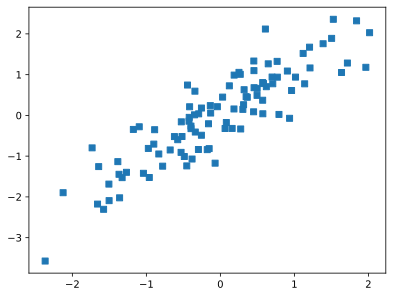

In [12]:
N = 100
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

plt.plot(x,y,'s')
plt.show()

In [13]:






ANNreg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [14]:
learning_rate = 0.1
lossFun = nn.MSELoss()
optimizer = torch.optim.SGD(ANNreg.parameters(),lr = learning_rate)


In [15]:
# train the model
numepochs = 1000
losses = torch.zeros(numepochs)


for epoch in range(numepochs):
  # farward pass
  yHat = ANNreg(x)

  # compuse the loss
  loss = lossFun(yHat,y)
  losses[epoch] = loss



  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


In [16]:
predictions = ANNreg(x)

testloss = (predictions - y).pow(2).mean()

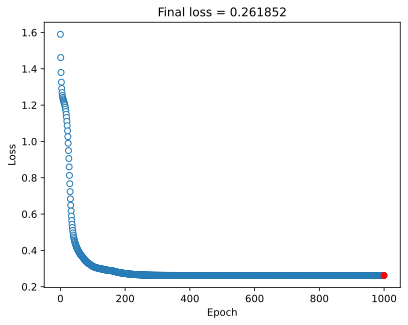

In [17]:
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

[[1.         0.88811155]
 [0.88811155 1.        ]]


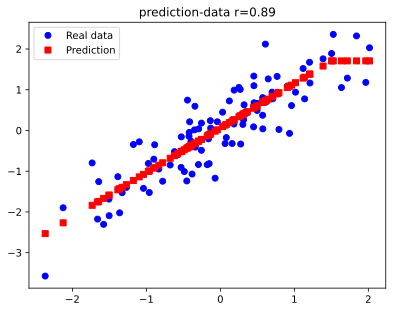

In [18]:
plt.plot(x,y, 'bo', label='Real data')
plt.plot(x,predictions.detach(), 'rs', label='Prediction')
print(np.corrcoef(y.T,predictions.detach().T))
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()